# Intensity Transformation part 01

## Identity Transformation

In this case, the output value of the pixel depends only the input value of that pixel . **Not it neighbors**  

Intensity transform of f(x) is denoted by T[[f(x)]]. Lets consider about identity transform ( T(.) = 1 )

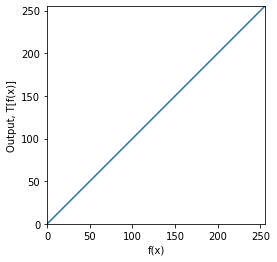

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
transform = np.arange(0, 256).astype("uint8") # create a vector of values from zero to 255 in  uint8 data type. each position of vector consiost the value same as position value. 
fig, axes = plt.subplots() # creating suplots using matplotlib
axes.plot(transform)  # plot the values of vector 
axes.set_xlabel("f(x)")
axes.set_ylabel("Output, T[f(x)]")
axes.set_xlim(0,255)
axes.set_ylim(0,255)
axes.set_aspect("equal") # set the ratio of x axis and y axis units are equal
plt.show()

Using above transformation function try to apply it for image. Using opencv HighGUI

1. Look-up tables (LUTs) are very common in custom filters in which two pixels with the same value in the input involves the same value in the output too.

2. An LUT transformation assigns a new pixel value to each pixel in the input image according to the values given by a table. In this table, the index represents the input intensity value and the content of the cell given by the index represents the corresponding output value.

You can see there is no difference between original and transformed image. Because the transformation function is identity.

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
transform = np.arange(0, 256).astype("uint8") 

image_original = cv.imread(".\image\ema.jpg", cv.IMREAD_GRAYSCALE)
print(image_original.shape)

cv.namedWindow("Image", cv.WINDOW_AUTOSIZE) # Showing original picture i grayscale using opencv HighGUI
cv.imshow("Image", image_original)
cv.waitKey(0)  #wait for a key press

image_transformed = cv.LUT(image_original, transform) # cv.LUT get original image that want to be transform as first parameter & transfer function as second parameter
cv.imshow("Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

(1008, 1486)


## Negative Transformation


Code is simillar as previous one. But the transform vector is different.

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
transform = np.arange(255,-1,-1).astype("uint8") # create a vector of values from 255 to 0 in  uint8 data type. each position of vector consiost the value same as position value. 
fig, axes = plt.subplots() # creating suplots using matplotlib
axes.plot(transform)  # plot the values of vector 
axes.set_xlabel("f(x)")
axes.set_ylabel("Output, T[f(x)]")
axes.set_xlim(0,255)
axes.set_ylim(0,255)
axes.set_aspect("equal") # set the ratio of x axis and y axis units are equal


#######################################################################

image_original = cv.imread(".\image\ema.jpg", cv.IMREAD_GRAYSCALE)
print(image_original.shape)
image_original = cv.cvtColor(image_original, cv.COLOR_BGR2RGB)
#cv.namedWindow("Image", cv.WINDOW_AUTOSIZE) # Showing original picture i grayscale using opencv HighGUI
#cv.imshow("Image", image_original)
#cv.waitKey(0)  #wait for a key press

image_transformed = cv.LUT(image_original, transform) # cv.LUT get original image that want to be transform as first parameter & transfer function as second parameter

axes.imshow(image_transformed)
#cv.imshow("Image", image_transformed)
#cv.waitKey(0)
#cv.destroyAllWindows()
plt.show()